In [37]:
# Import necessary packages
import pandas
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

x = pandas.read_csv('../datapoints.txt',delimiter='\t', parse_dates=True, date_parser=dateparse, index_col='DateTime', names=['DateTime', 'EN', 'INTL', "NOLANG"], header=None)


In [38]:
def pred_plot(x):
    # Create figure and plot space
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    y = x.resample("D").sum()

    cols = ["EN","INTL","NOLANG"]
    for i in range(len(cols)):
        # Add x-axis and y-axis
        ax[0,i].scatter(x.index.values,
                x[cols[i]],
                color='purple')

        # Set title and labels for axes
        ax[0,i].set(xlabel="Date",
            ylabel=cols[i] + " candidates",
            title="RAW sample data")

        ax[0,i].axvline(pandas.to_datetime('2021-11-19T10:00'), color='r', linestyle='--', lw=2, label="dedup fixed")
        
        # fit least-squares with an intercept
        y_values = x.loc[:, cols[i]]
        x_values = np.linspace(0,1,len(x.loc[:, cols[i]]))
        poly_degree = 50

        coeffs = np.polyfit(x_values, y_values, poly_degree)
        poly_eqn = np.poly1d(coeffs)
        y_hat = poly_eqn(x_values)
        ax[0,i].plot(x.index,y_hat)

    for i in range(len(cols)):
        # Add x-axis and y-axis
        ax[1,i].scatter(y.index.values,
                40*y[cols[i]],
                color='red')

        # Set title and labels for axes
        ax[1,i].set(xlabel="Date",
            ylabel=cols[i] + " candidates",
            title="RAW sample data")

        ax[1, i].axvline(pandas.to_datetime('2021-11-19T10:00'), color='r', linestyle='--', lw=2, label="dedup fixed")
        
        # fit least-squares with an intercept
        y_values = 40*y.loc[:, cols[i]]
        x_values = np.linspace(0,1,len(y.loc[:, cols[i]]))
        poly_degree = 50

        coeffs = np.polyfit(x_values, y_values, poly_degree)
        poly_eqn = np.poly1d(coeffs)
        y_hat = poly_eqn(x_values)
        ax[1, i].plot(y.index,y_hat)


    fig.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    fig.tight_layout()

/tmp/ipykernel_2803/3892451755.py:2: RankWarning: Polyfit may be poorly conditioned
  pred_plot(x)
/tmp/ipykernel_2803/3892451755.py:2: RankWarning: Polyfit may be poorly conditioned
  pred_plot(x)
/tmp/ipykernel_2803/3892451755.py:2: RankWarning: Polyfit may be poorly conditioned
  pred_plot(x)
/tmp/ipykernel_2803/3892451755.py:2: RankWarning: Polyfit may be poorly conditioned
  pred_plot(x)
/tmp/ipykernel_2803/3892451755.py:2: RankWarning: Polyfit may be poorly conditioned
  pred_plot(x)
/tmp/ipykernel_2803/3892451755.py:2: RankWarning: Polyfit may be poorly conditioned
  pred_plot(x)


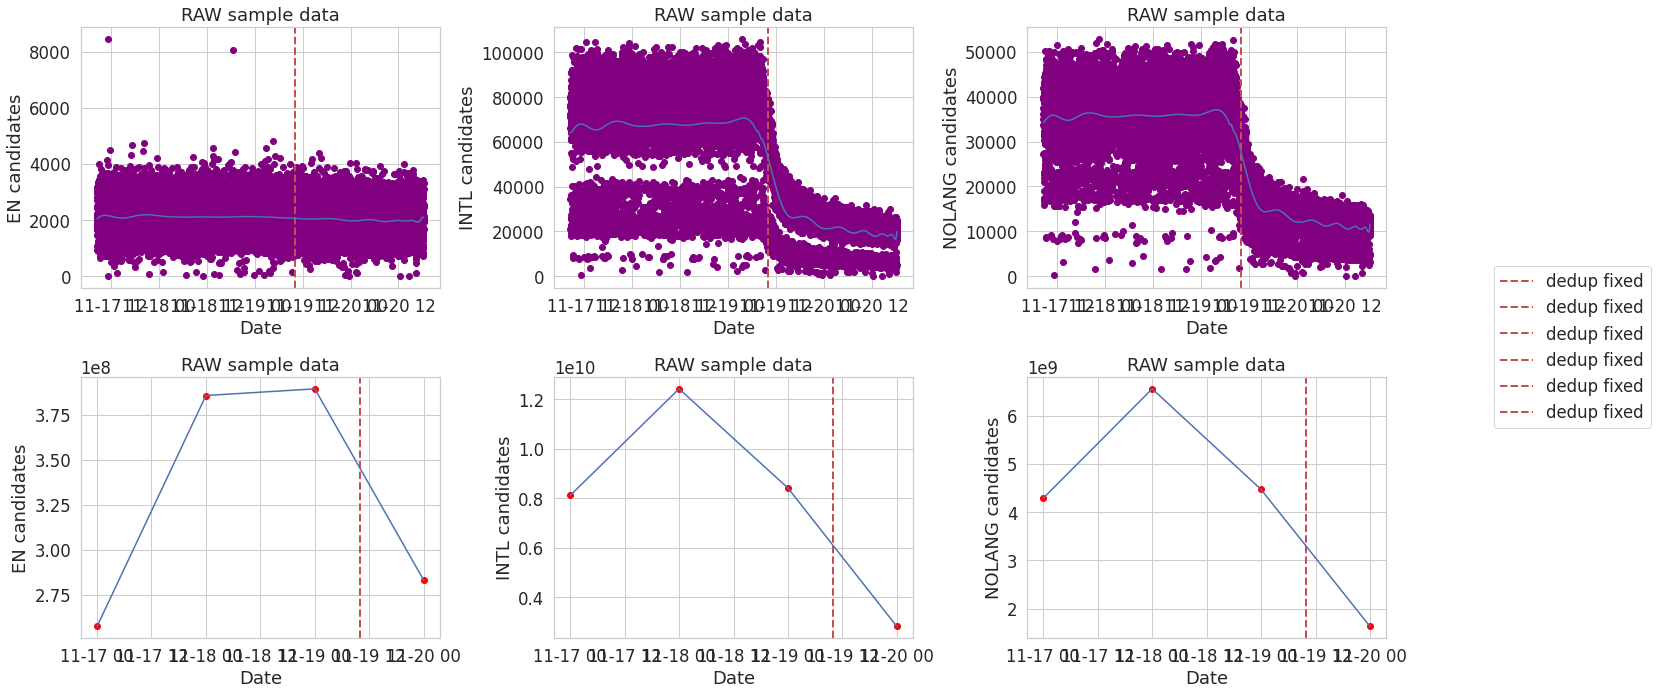

In [39]:
# Create figure and plot space
pred_plot(x)